In [1]:
import numpy as np
import pandas as pd
import wave 
import matplotlib.pyplot as plt
import librosa
import os
import module as md


先把聲音分別輸入到python處理好並分別儲存下來

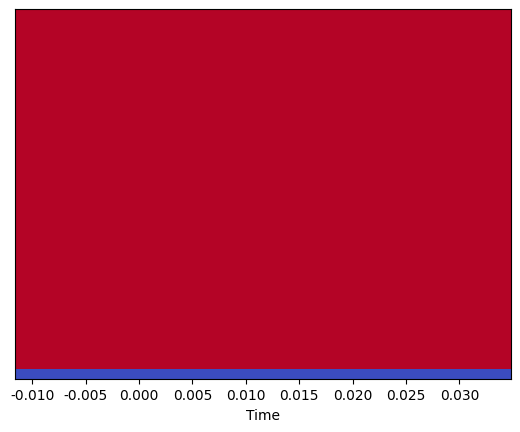

In [3]:
soundpath  = r"D:\使用者\Desktop\python\kaggle competition\recognition of voice emotion\archive (3)\Actor_01\03-01-01-01-01-01-01.wav"
file = wave.open(soundpath, 'r')
fname = os.path.basename(soundpath)
signal_array , freq , amplitude = md.params(file)


nperseg = max(len(signal_array) // 2, 4)
noverlap = max(len(signal_array) // 8, 1)
if noverlap >= nperseg:
    noverlap = nperseg - 1
i = signal_array.astype(float)
Zxx = md.stft(i , freq , nperseg, noverlap , "hann")
#計算功率譜
power_spectrogram = np.abs(Zxx) ** 2
mfccs = librosa.feature.mfcc(S=librosa.power_to_db(power_spectrogram), n_mfcc=39)

# delta_mfccs = librosa.feature.delta(mfccs,order=1)
# delta2_mfccs = librosa.feature.delta(mfccs,order=2)
# combined_mfcc = np.concatenate((mfccs, delta_mfccs,delta2_mfccs), axis=1)

# 使用 librosa.display.specshow 将 MFCC 特征绘制成图表
librosa.display.specshow(mfccs, x_axis='time')
#儲存圖片
plt.savefig(r"D:\使用者\Desktop\python\kaggle competition\recognition of voice emotion\聲音圖\聲音圖{}.png".format(fname))
 